In [1]:
import pandas as pd
import missingno as msno

# libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from textblob import TextBlob
import pandas as pd
import numpy as np
import os
import itertools

from matplotlib.ticker import MaxNLocator

%matplotlib inline

## 1. Cumulative Counts by Year

In [294]:
df = pd.read_csv('cooccurrance_df.csv')
df.head()

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\2731719034.py:1: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cooccurrance_df.csv')


Unnamed: 0      doc  line  Amsterdam  Antwerp  Barcelona  Berlin  Bilbao  \
0           0  2006-02     2          0        0          0       0       0   
1           1  2006-02     8          0        0          1       0       0   
2           2  2006-03    18          0        0          0       0       0   
3           3  2006-04    46          0        0          1       0       0   
4           4  2006-04    45          0        0          1       0       0   

   Birmingham  Brussels  ...  Prague_merged  Sevilla_merged  \
0           0         0  ...              0               0   
1           0         0  ...              0               0   
2           1         0  ...              0               0   
3           0         0  ...              0               0   
4           0         0  ...              0               0   

   Oberhausen_merged  Herne,_North_Rhine-Westphalia_merged  Nuremberg_merged  \
0                  0                                     0                 0   
1                  0                                     0                 0   
2                  0                                     0                 0   
3                  0                                     0                 0   
4                  0                                     0                 0   

   created_utc   score    subreddit    link_id   subreddit_id  
0   1139003115       8   reddit.com    t3_18gy           t5_6  
1   1139517217       4   reddit.com    t3_1dp6           t5_6  
2   1143810425      16   reddit.com    t3_3qiz           t5_6  
3   1146234649       1   reddit.com   t3_5y81a           t5_6  
4   1146212582       3   reddit.com   t3_5y81a           t5_6  

[5 rows x 58 columns]

In [295]:
city_df = pd.read_csv('city_variations.csv')
cities = list(city_df['col'][city_df['pop']>1000])

In [767]:
def pair_to_string(pair):
    
    pair.sort()
    #turn a city-pair list into a string 
    text = str(pair).replace('[','').replace(']','').replace('\'','').replace(',','-').replace(' ','')
    return text

def create_counts_df(toponyms, df):
    
    #input toponym co-occurrence matrix, output into a sorted list of city-pair counts
    #used to determine highlight pairs for graph
    
    combinations = list(itertools.combinations(toponyms, 2))
    cols = ['pair', 'count', 'indices']
    data = []
    for i in combinations:
        i = list(i)
        c1 = i[0]
        c2 = i[1]
        i = pair_to_string(i).replace('_merged', '')
        row = []
        row.append(i)
        city_df = df[df[c1]==1][df[c2]==1]
        count = len(city_df)
        row.append(count)
        occurrances = list(city_df.index)
        row.append(occurrances)
        data.append(row)

    df2 = pd.DataFrame(data, columns=cols).sort_values(by = 'count', ascending=False)
    
    return df2

counts_df = create_counts_df(cities, df)

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


In [769]:
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

In [770]:
#Get year totals to normalize toponym co-occurrence counts per year
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\year_dfs"
years = [year for year in range(2006,2021)]
year_totals = {}
for year in years:
    year_df = pd.read_csv(os.path.join(path, str(year) + '.csv'))
    total = int(year_df['count'].sum())
    year_totals[year] = total

In [ ]:
#loop through all pair csv files
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
files = os.listdir(path)
years = [year for year in range(2006,2021)]
for file in files:

#load pair df
    pair_df = pd.read_csv(os.path.join(path, file))
    pair_df = pair_df[pair_df['year']<2021]
#create empty norm list
    norm = []
#iterate years. Divide by corresponding year in year_totals dictionary. Append norm list
    for year in years:
        part = int(pair_df[pair_df['year']==year]['count'])
        whole = year_totals[year]
        norm.append(100*part/whole)
    pair_df['norm'] = norm
    pair_df.to_csv(os.path.join(path, file))

FrankfurtamMain-Sevilla file not found
FrankfurtamMain-Lyon file not found
FrankfurtamMain-Prague file not found
Barcelona-FrankfurtamMain file not found
FrankfurtamMain-Sofia file not found
FrankfurtamMain-Liverpool file not found
FrankfurtamMain-Porto file not found
Berlin-FrankfurtamMain file not found
FrankfurtamMain-Milan file not found
Dublin-FrankfurtamMain file not found
FrankfurtamMain-Glasgow file not found
FrankfurtamMain-Helsinki file not found
FrankfurtamMain-Madrid file not found
Amsterdam-FrankfurtamMain file not found
FrankfurtamMain-Rotterdam file not found
FrankfurtamMain-London file not found
FrankfurtamMain-Paris file not found
Athens-FrankfurtamMain file not found
FrankfurtamMain-Katowice file not found
FrankfurtamMain-Torino file not found
FrankfurtamMain-Stuttgart file not found
FrankfurtamMain-Manchester file not found
FrankfurtamMain-Hamburg file not found
Budapest-FrankfurtamMain file not found
Bucuresti-FrankfurtamMain file not found
FrankfurtamMain-Naples fi

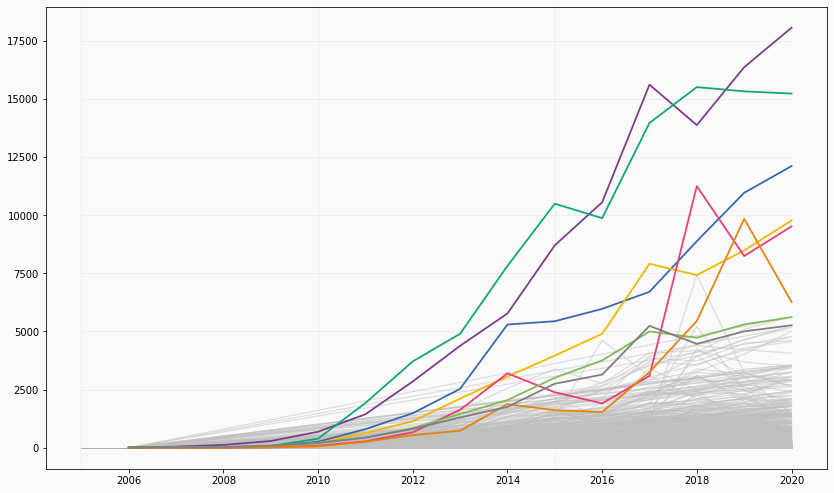

In [773]:
# SET PARAMETER
highlight_list = highlight_pairs
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
left = 2005
right = 2020
increments = 5
bottom = 0
top = 20000
numlines = 8
time = 'year'
Y = 'count'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (14, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'pair', Y , 'norm']]
    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

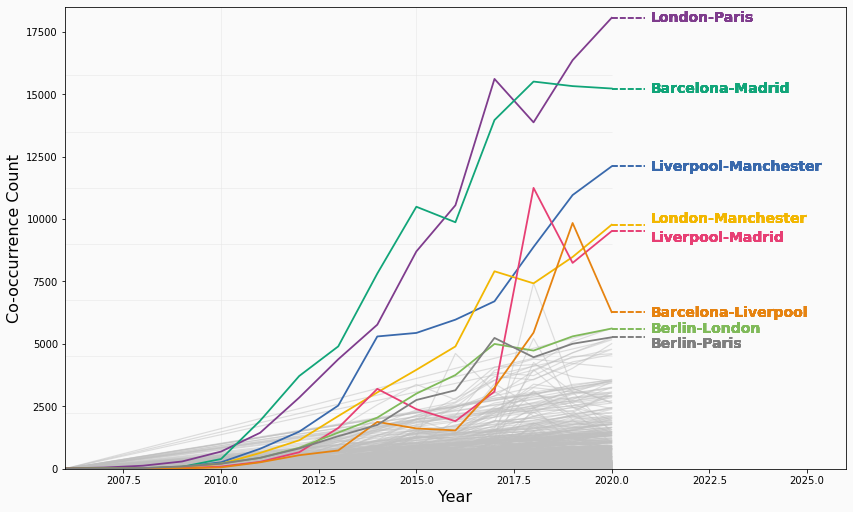

In [194]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2006, 2025)
ax.set_ylim(-0.1, 20)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 1:
        y_end = LABEL_Y[idx] + 0
    elif idx == 3:
        y_end = LABEL_Y[idx] + 0
    elif idx == 5:
        y_end = LABEL_Y[idx] + 0
    elif idx == 6:
        y_end = LABEL_Y[idx] + 0
    elif idx == 7:
        y_end = LABEL_Y[idx] - 0
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=11.5, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "soccer",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

## Normalized Counts per Year

In [235]:
highlight_pairs = highlight_pairs[:5]
highlight_pairs

['London-Paris',
 'Barcelona-Madrid',
 'Liverpool-Manchester',
 'London-Manchester',
 'Liverpool-Madrid']

FrankfurtamMain-Sevilla file not found
FrankfurtamMain-Lyon file not found
FrankfurtamMain-Prague file not found
Barcelona-FrankfurtamMain file not found
FrankfurtamMain-Sofia file not found
FrankfurtamMain-Liverpool file not found
FrankfurtamMain-Porto file not found
Berlin-FrankfurtamMain file not found
FrankfurtamMain-Milan file not found
Dublin-FrankfurtamMain file not found
FrankfurtamMain-Glasgow file not found
FrankfurtamMain-Helsinki file not found
FrankfurtamMain-Madrid file not found
Amsterdam-FrankfurtamMain file not found
FrankfurtamMain-Rotterdam file not found
FrankfurtamMain-London file not found
FrankfurtamMain-Paris file not found
Athens-FrankfurtamMain file not found
FrankfurtamMain-Katowice file not found
FrankfurtamMain-Torino file not found
FrankfurtamMain-Stuttgart file not found
FrankfurtamMain-Manchester file not found
FrankfurtamMain-Hamburg file not found
Budapest-FrankfurtamMain file not found
Bucuresti-FrankfurtamMain file not found
FrankfurtamMain-Naples fi

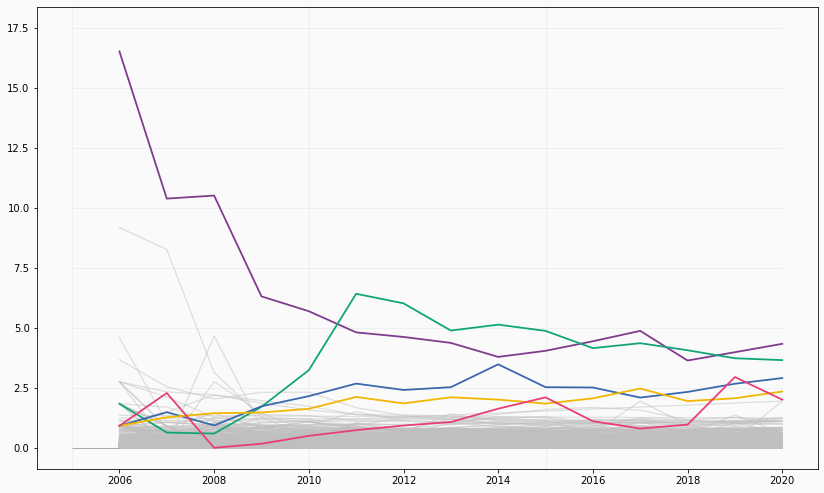

In [236]:
# SET PARAMETER
highlight_list = highlight_pairs
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
left = 2005
right = 2020
increments = 5
bottom = 0
top = 20
numlines = 8
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (14, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'pair', Y ]]
    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

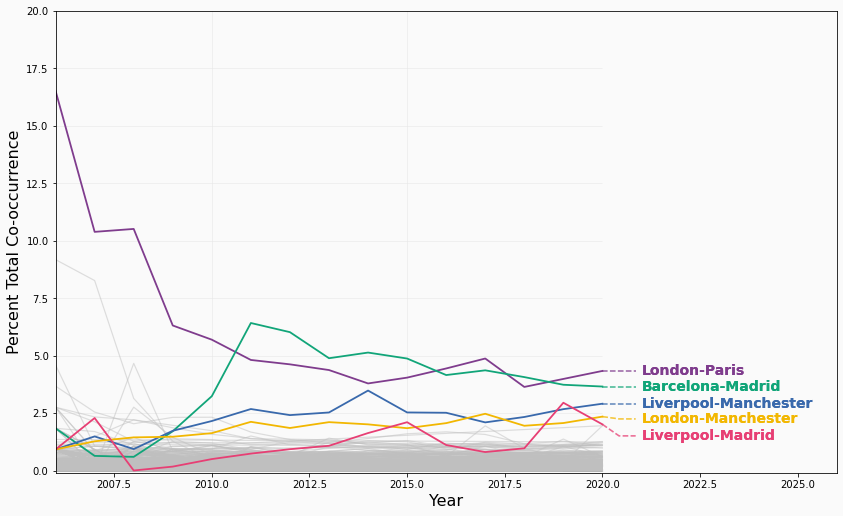

In [239]:


# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2006, 2026)
ax.set_ylim(-0.1, 20)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'pair', 'count', 'norm']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    
    if idx == 3:
        y_end = LABEL_Y[idx]-0.1
    #move Liverpool Madrid down
    elif idx == 4:
        y_end = LABEL_Y[idx] - 0.5
    elif idx == 5:
        y_end = LABEL_Y[idx] - 0.75
    elif idx == 6:
        y_end = LABEL_Y[idx] - 1
    elif idx == 7:
        y_end = LABEL_Y[idx] - 1.25
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
    # Add country text
    if idx == 31:
        ax.text(
        x_end, 
        y_end-.1, 
        pair, 
        color=color, 
        fontsize=14, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
    
    
    #move Liverpool Madrid down
    elif idx == 14:
        ax.text(
        x_end, 
        y_end-1.3, 
        pair, 
        color=color, 
        fontsize=14, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
    
        
    else:
        ax.text(
            x_end, 
            y_end, 
            pair, 
            color=color, 
            fontsize=14, 
            weight="bold", 
            fontfamily="Montserrat", 
            va="center"
        )
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

In [212]:
highlight_pairs

['London-Paris',
 'Barcelona-Madrid',
 'Liverpool-Manchester',
 'London-Manchester',
 'Liverpool-Madrid',
 'Berlin-London',
 'Barcelona-Liverpool',
 'Berlin-Paris']

## Normalized Counts for Largest Subreddits

In [405]:
#find the subreddits with the most co-occurrences
top_10 = df[' subreddit'].value_counts()[:10]
subreddits = top_10.keys()
years = [i for i in range(2006,2021)]

In [453]:
#create a directory for each subreddit
parent = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
for sub in subreddits:
    path = os.path.join(parent, sub)
    os.mkdir(path)

In [454]:
#create pair_dfs for each subreddit
for sub in subreddits:
    path = os.path.join(parent, sub)
    sub_df = df[df[' subreddit']==sub]
    for i in combinations:
        c1 = i[0]
        c2 = i[1]
        c = list([c1, c2])
        c.sort()
        file = c[0]+'-'+c[1]+'.csv'
        file = file.replace(' ', '').replace('_merged', '')
        fp = os.path.join(path, file)
        pair_df = pd.DataFrame()
        counts = []
        occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
        
        #if no co-occurrences fill year with 0
        for year in years:
            try:
                counts.append(occs[str(year)])
            except:
                counts.append(0)
        
        pair_df['count'] = counts
        pair_df['year'] = years
        pair_df.to_csv(fp)

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  occs = sub_df[sub_df[c1]!=0][sub_df[c2]!=0].groupby('year').sum()[c1]
C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\3407839208.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame

#### Create norm column in all subreddit dfs so that axes have the same scale

In [517]:
#NOTE: size of subreddit determined by the number of comments with co-occurrences

In [515]:
#create "sub_totals" dictionary to be added to sub pair df's for normalization
parent = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
sub_totals = {}
for sub in subreddits:
    path = os.path.join(parent, sub)
    total = []
    for year in years:
        tot = 0
        for file in os.listdir(path):
            fp = os.path.join(path, file)
            temp_df = pd.read_csv(fp)
            count = temp_df[temp_df['year']==year]['count']
            tot = tot+count
        total.append(tot)
    sub_totals[sub] = total
    print(sub+' complete')

 soccer complete
 AskReddit complete
 travel complete
 europe complete
 reddevils complete
 LiverpoolFC complete
 solotravel complete
 worldnews complete
 FantasyPL complete
 ukpolitics complete


In [560]:
parent = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
for sub in subreddits:

    path = os.path.join(parent, sub)
    for file in os.listdir(path):

        pair_df = pd.read_csv(os.path.join(path, file))
        pair_df['total'] = [int(i) for i in sub_totals[sub]]
        norm = []
        for idx, row in pair_df.iterrows():
            
            part = int(row['count'])
            whole = int(row['total'])
            if whole > 0:
                norm.append(100*part/whole)
            else:
                norm.append(0)
                
        pair_df['norm'] = norm
        
        pair_df.to_csv(os.path.join(path, file))

### 'Soccer'

In [704]:
sub = subreddits[0]
counts_df = create_counts_df(cities, df[df[' subreddit']==subreddits[0]])

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


In [705]:
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

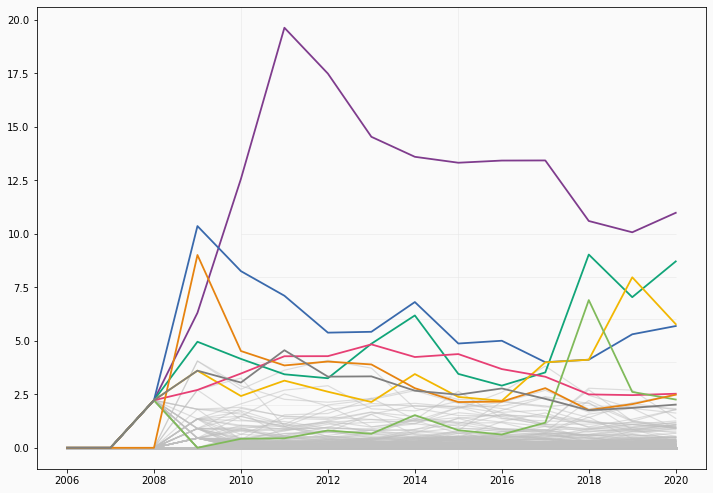

In [706]:
sub = subreddits[0]

# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2010
right = 2020
increments = 5
bottom = 0
top = 12
numlines = 6
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

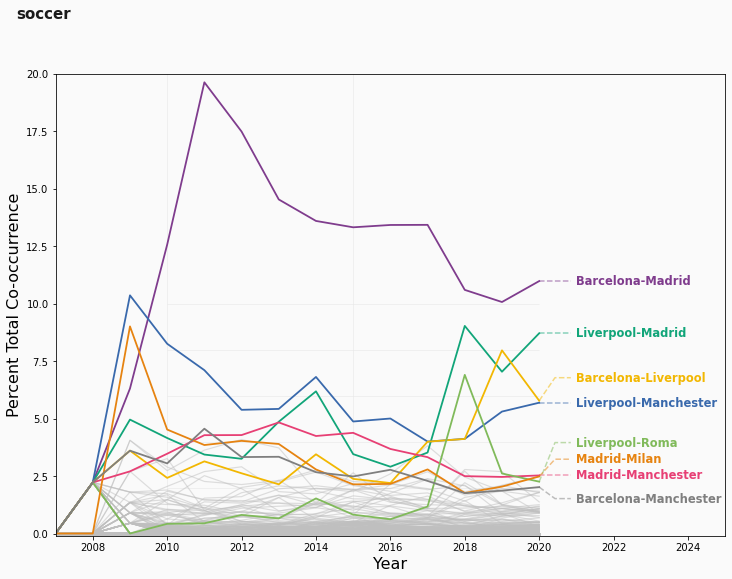

In [707]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2007, 2025)
ax.set_ylim(-0.1, 20)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 1:
        y_end = LABEL_Y[idx] + 0
    elif idx == 3:
        y_end = LABEL_Y[idx] + 1
    elif idx == 5:
        y_end = LABEL_Y[idx] + 1.7
    elif idx == 6:
        y_end = LABEL_Y[idx] + 0.75
    elif idx == 7:
        y_end = LABEL_Y[idx] - 0.5
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=11.5, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "soccer",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

In [634]:
highlight_pairs

['Barcelona-Madrid',
 'Liverpool-Madrid',
 'Liverpool-Manchester',
 'Barcelona-Liverpool',
 'Madrid-Manchester',
 'Liverpool-Roma',
 'Madrid-Milan',
 'Barcelona-Manchester']

### 'AskReddit'

In [561]:
counts_df = create_counts_df(cities, df[df[' subreddit']==subreddits[1]])

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


In [562]:
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

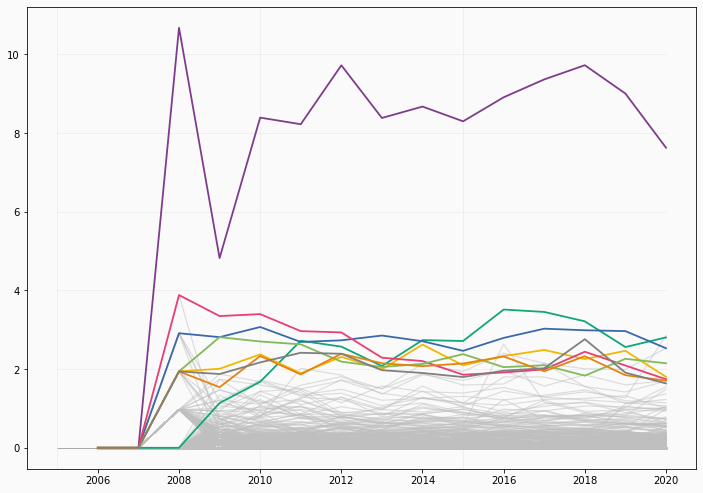

In [593]:
# SET PARAMETER
highlight_list = highlight_pairs
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs\ AskReddit"
left = 2005
right = 2020
increments = 5
bottom = 0
top = 12
numlines = 6
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]
    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

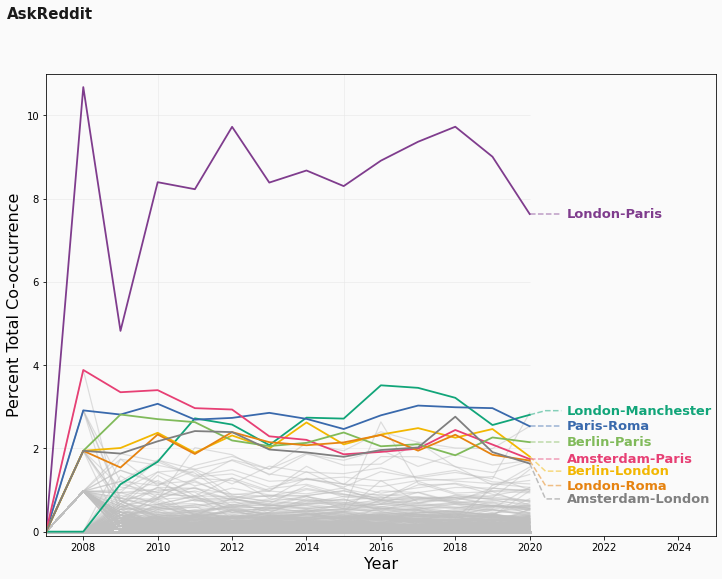

In [594]:

# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2007, 2025)
ax.set_ylim(-0.1, 11)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 1:
        y_end = LABEL_Y[idx] + .1
    elif idx == 3:
        y_end = LABEL_Y[idx] - .35
    elif idx == 6:
        y_end = LABEL_Y[idx] - .6
    elif idx == 7:
        y_end = LABEL_Y[idx] - .85
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "AskReddit",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

### travel

In [648]:
sub = subreddits[2]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


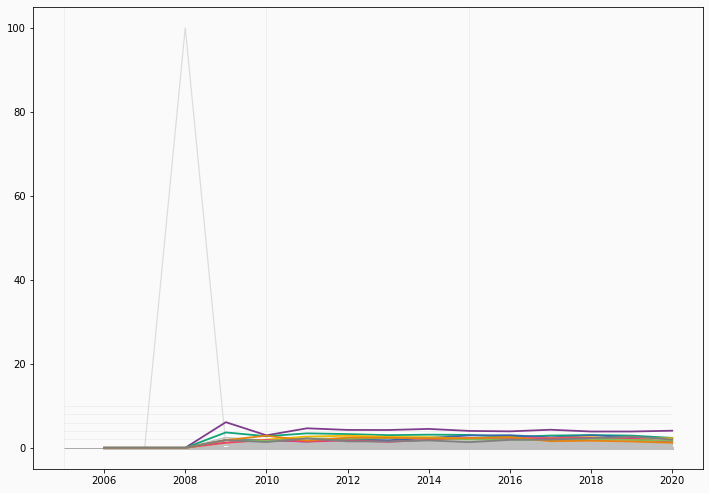

In [655]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 12
numlines = 6
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

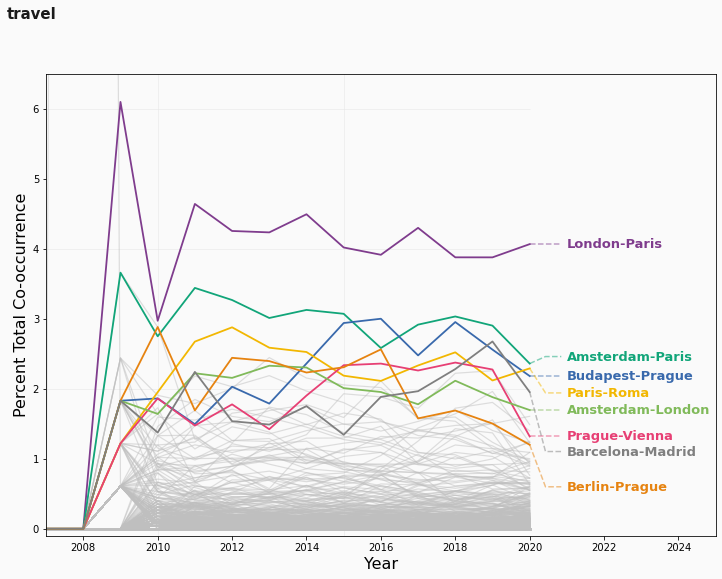

In [656]:

# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2007, 2025)
ax.set_ylim(-0.1, 6.5)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 1:
        y_end = LABEL_Y[idx] + .1
    elif idx == 3:
        y_end = LABEL_Y[idx] - .35
    elif idx == 6:
        y_end = LABEL_Y[idx] - .6
    elif idx == 7:
        y_end = LABEL_Y[idx] - .85
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "travel",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

### europe

In [675]:
subreddits[3]

' europe'

In [670]:
sub = subreddits[3]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


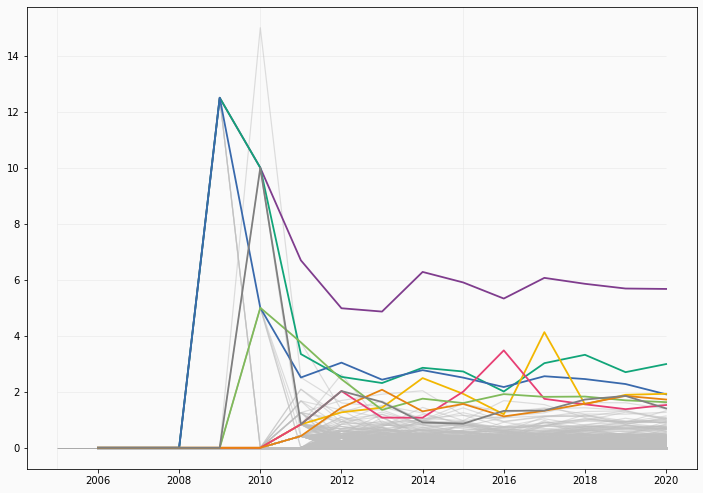

In [693]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 16
numlines = 8
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

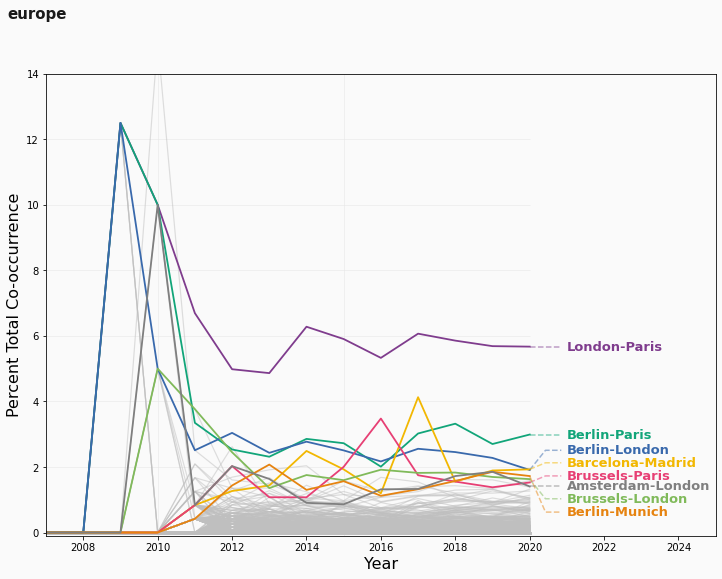

In [694]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2007, 2025)
ax.set_ylim(-0.1, 14)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 2:
        y_end = LABEL_Y[idx] + .6
    elif idx == 3:
        y_end = LABEL_Y[idx] + .2
    elif idx == 4:
        y_end = LABEL_Y[idx] +.2
        
    elif idx == 5:
        y_end = LABEL_Y[idx] - .6
    elif idx == 6:
        y_end = LABEL_Y[idx] - 1.1
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "europe",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

In [695]:
subreddits[4]

' reddevils'

In [697]:
sub = subreddits[4]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


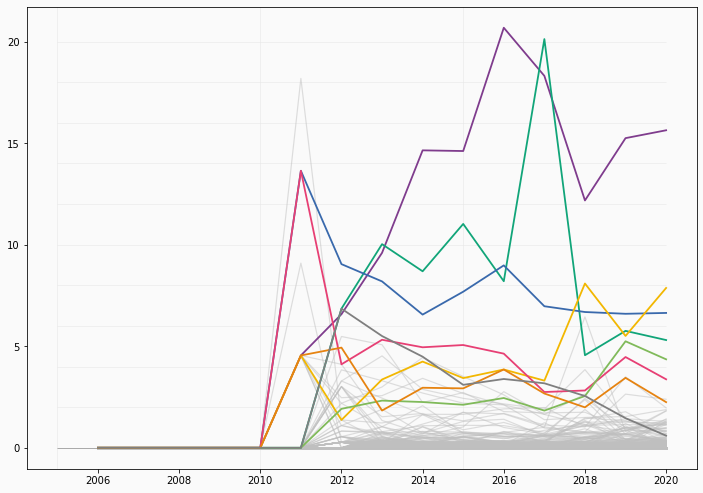

In [702]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 22
numlines = 11
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

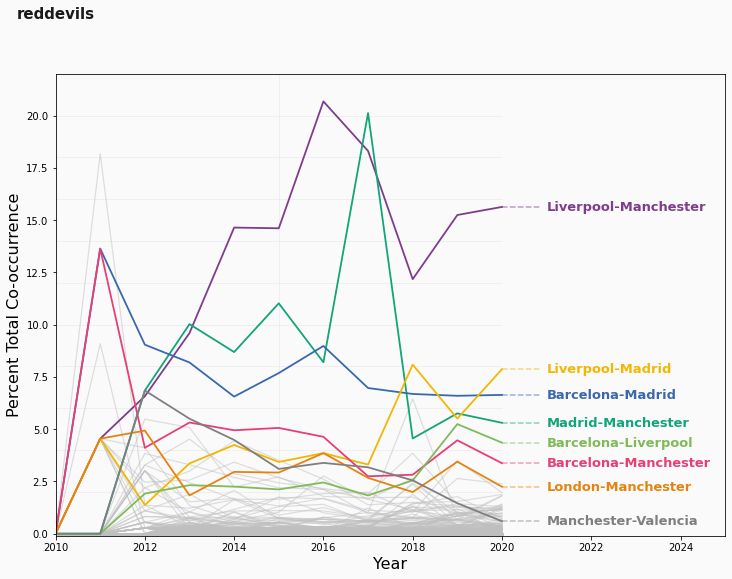

In [703]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2010, 2025)
ax.set_ylim(-0.1, 22)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 2:
        y_end = LABEL_Y[idx] + 0
    elif idx == 3:
        y_end = LABEL_Y[idx] + 0
    elif idx == 4:
        y_end = LABEL_Y[idx] +0
        
    elif idx == 5:
        y_end = LABEL_Y[idx] - 0
    elif idx == 6:
        y_end = LABEL_Y[idx] - 0
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "reddevils",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

### LiverpoolFC

In [714]:
subreddits[5]

' LiverpoolFC'

In [709]:
sub = subreddits[5]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


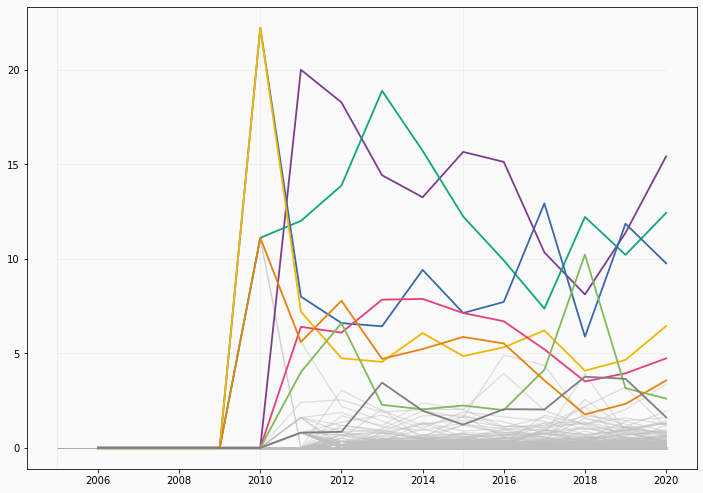

In [712]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 25
numlines = 5
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

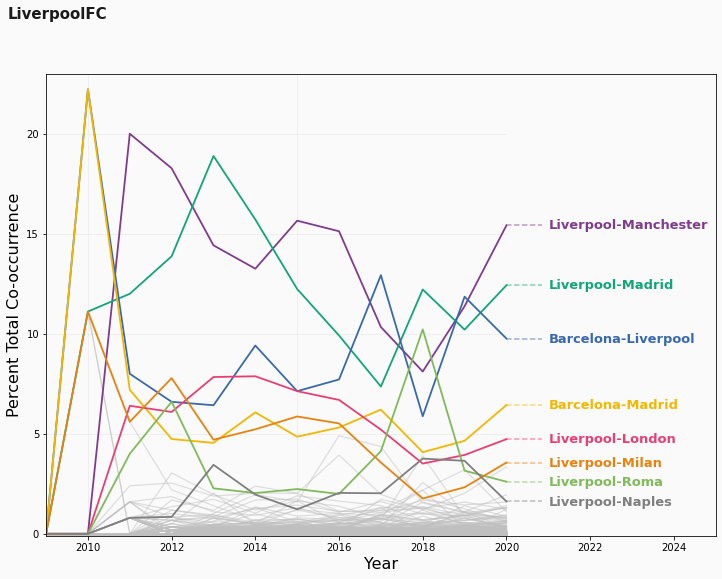

In [713]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2009, 2025)
ax.set_ylim(-0.1, 23)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 2:
        y_end = LABEL_Y[idx] + 0
    elif idx == 3:
        y_end = LABEL_Y[idx] + 0
    elif idx == 4:
        y_end = LABEL_Y[idx] +0
        
    elif idx == 5:
        y_end = LABEL_Y[idx] - 0
    elif idx == 6:
        y_end = LABEL_Y[idx] - 0
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "LiverpoolFC",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

### solootravel

In [725]:
sub = subreddits[6]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


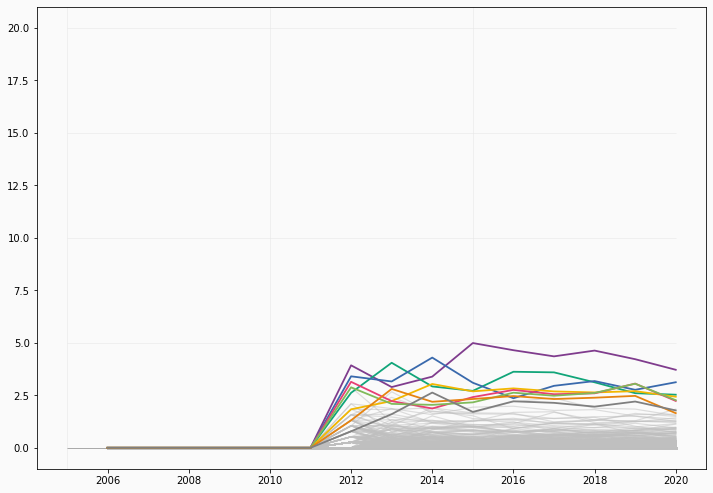

In [743]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 25
numlines = 5
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column


# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

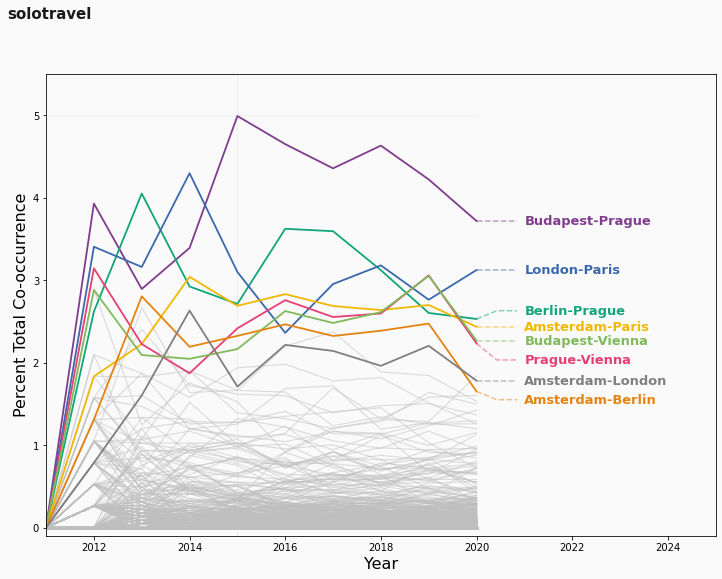

In [744]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2011, 2025)
ax.set_ylim(-0.1, 5.5)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 1:
        y_end = LABEL_Y[idx] + 0.1
    elif idx == 3:
        y_end = LABEL_Y[idx] + 0
    elif idx == 4:
        y_end = LABEL_Y[idx] -.2
        
    elif idx == 5:
        y_end = LABEL_Y[idx] - 0
    elif idx == 6:
        y_end = LABEL_Y[idx] - .1
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "solotravel",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

### worldnews

In [745]:
sub = subreddits[7]
counts_df = create_counts_df(cities, df[df[' subreddit']==sub])
highlight_pairs = list(counts_df['pair'].iloc[:8])
not_highlights = [i for i in list(counts_df['pair']) if i not in highlight_pairs]

C:\Users\kodri\AppData\Local\Temp\ipykernel_14124\516561271.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


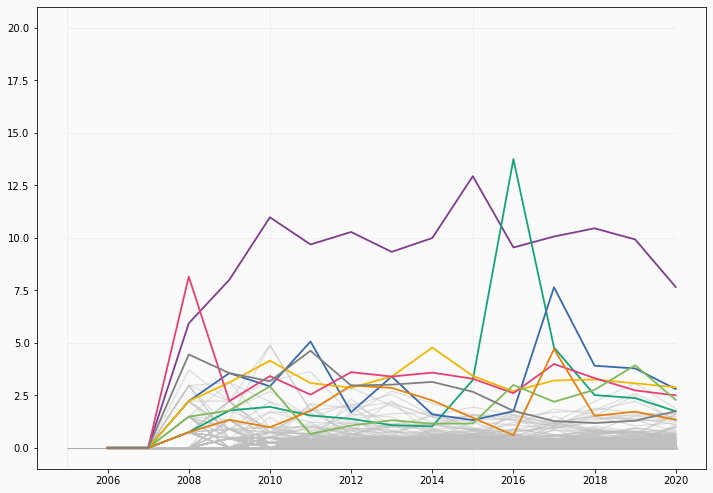

In [760]:
# SET PARAMETER
highlight_list = highlight_pairs
path = os.path.join(r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs", sub)
left = 2005
right = 2020
increments = 5
bottom = 0
top = 25
numlines = 5
time = 'year'
Y = 'norm'

#df should have a column with categories (including highlight and non-highlight pairs) and time column (years or months)
#df is a list of data frames corresponding to a line on the graph with a year and count column

# Vertical lines every 5 years

VLINES = np.arange(left, right, increments)

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (12, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
scale_factor = (top-bottom)/numlines
ax.hlines(y=scale_factor*np.arange(0, numlines), xmin=left, xmax=right, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
ax.hlines(y=0, xmin=left, xmax=right, color=GREY60, lw=0.8)

for pair in not_highlights:
    
    file = pair+'.csv'
 
    try:
        data = pd.read_csv(os.path.join(path, file)).reset_index()
     
        ax.plot("year", Y, c=GREY75, lw=1.2, alpha=0.5, data=data)
    except FileNotFoundError:
        print(pair + ' file not found')

        
final_Y = []

for idx, pair in enumerate(highlight_pairs):
    file = pair+'.csv'
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year',  Y ]]

    final_Y.append(data.iloc[-1][Y])
    color = COLOR_SCALE[idx]
    ax.plot("year", Y, color=color, lw=1.8, data=data)

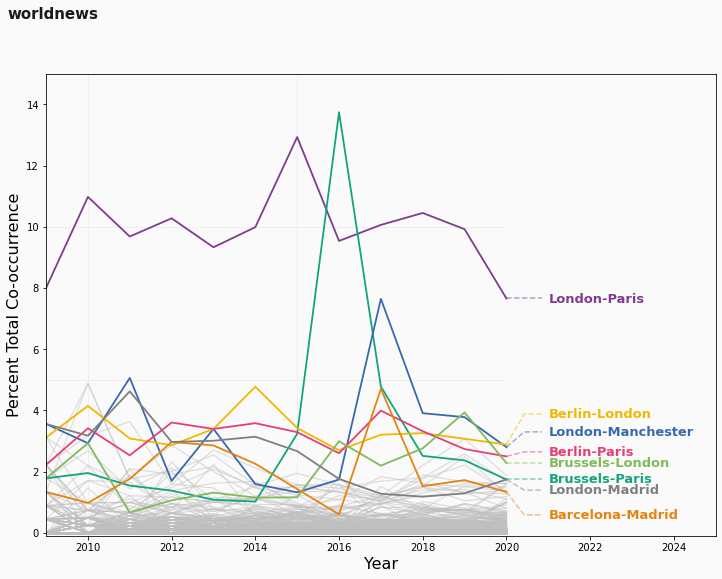

In [761]:
# First, adjust axes limits so annotations fit in the plot
ax.set_xlim(2009, 2025)
ax.set_ylim(-0.1, 15)

#get counts for final year for each pair in highlight_pairs
LABEL_Y = final_Y

x_start = 2020
x_end = 2021
PAD = 0.15

# Add labels for highlighted countries honly
for idx, pair in enumerate(highlight_pairs):
    
    data = pd.read_csv(os.path.join(path, file)).sort_values(by='year').reset_index()[['year', 'count']]
    data = data[data['year']==2020]
    color = COLOR_SCALE[idx]
    
    #+- 500 for 4th and 5th pairs
    # Vertical start of line
   
    y_start = LABEL_Y[idx]
        
    # Vertical end of line - use this to adjust hight if text is moved
    if idx == 2:
        y_end = LABEL_Y[idx] + 0.5
    elif idx == 3:
        y_end = LABEL_Y[idx] + 1
    elif idx == 4:
        y_end = LABEL_Y[idx] + .15
        
    elif idx == 6:
        y_end = LABEL_Y[idx] - 0.75
    elif idx == 7:
        y_end = LABEL_Y[idx] - .35
    else:
        y_end = LABEL_Y[idx]
    
    
    # Add line based on three points
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - PAD], 
        [y_start, y_end, y_end], 
        color=color, 
        alpha=0.5, 
        ls="dashed"
    )
    
        
    ax.text(
        x_end, 
        y_end, 
        pair, 
        color=color, 
        fontsize=13, 
        weight="bold", 
        fontfamily="Montserrat", 
        va="center"
    )
        

fig.text(
    0.08,
    0.97,
    "worldnews",
    color=GREY10,
    fontsize=15,
    fontname="Montserrat",
    weight="bold",
)
        
ax.set_xlabel('Year', fontfamily="Montserrat", fontsize=16)
ax.set_ylabel('Percent Total Co-occurrence', fontfamily="Montserrat", fontsize=16)

fig

In [753]:
highlight_pairs

['London-Paris',
 'Brussels-Paris',
 'London-Manchester',
 'Berlin-London',
 'Berlin-Paris',
 'Brussels-London',
 'Barcelona-Madrid',
 'London-Madrid']

In [292]:
df['year'] = df['doc'].apply(lambda x: x[:4])
df.groupby('year').sum()

Unnamed: 0         line  Amsterdam  Antwerp  Barcelona  Berlin  \
year                                                                     
2006          2211         3441         10        1          6       5   
2007         59565        69427         25        1         13      47   
2008        391852       286422         66        4         31      92   
2009       3796442      3157568        258       19        200     272   
2010      32211460     20733938        711       58        848     784   
2011     237306770    137939603       1370      118       3282    1614   
2012    1211710971    590036038       2548      354       6423    3244   
2013    4042729404   1587392108       3819      579       9032    5253   
2014   11447388736   3600828444       5220      986      13472    7828   
2015   26320789100   6686430391       6934     1083      18189   11305   
2016   44021102160   8677881775       8608     1093      17502   13883   
2017   78726932185  14220666968      11350     1448      25913   18142   
2018  133004997540  21354766903      12829     1619      30709   19239   
2019  191024836904  26785519906      15427     1919      35513   22568   
2020  245203339480  29146479026      15407     2073      31378   25302   
2021   21428881956   2640175133       1179      149       2165    1968   

      Bilbao  Birmingham  Brussels  Budapest  ...  Munich_merged  \
year                                          ...                  
2006       0           2         2         0  ...              1   
2007       0           3         6         2  ...             10   
2008       2          18        33        11  ...             55   
2009       3          69        85        66  ...            145   
2010      28         230       272       183  ...            496   
2011      98         551       517       324  ...           1030   
2012     723         891      1037       783  ...           2598   
2013     558        1580      1495      1252  ...           4400   
2014    1261        2520      2361      1963  ...           6864   
2015    1491        3286      3536      3271  ...           8375   
2016    1605        3965      8276      3655  ...           9149   
2017    1752        4774      7351      4236  ...          10296   
2018    1690        5433      6688      4931  ...          11937   
2019    1928        6528      7495      6057  ...          13367   
2020    1865        8305      7889      4764  ...          14673   
2021     323         649       678       336  ...           1053   

      Cologne_merged  Copenhagen_merged  Torino_merged  Prague_merged  \
year                                                                    
2006               1                  4              0              1   
2007               7                  8              3             11   
2008               7                 24              3             31   
2009              35                 65             22            166   
2010              91                197             42            372   
2011             292                338            116            725   
2012             688                688            228           1372   
2013            1133               1302            553           2239   
2014            2283               1764           1002           3299   
2015            3966               2477           1525           4703   
2016            5474               2954           1865           5755   
2017            5016               3617           2456           6200   
2018            4813               3498           2647           7136   
2019            5336               3949           3365           8805   
2020            5734               4294           3461           6833   
2021             422                303            331            482   

      Sevilla_merged  Oberhausen_merged  Herne,_North_Rhine-Westphalia_merged  \
year                                                  

In [268]:
#Create 
#loop through all pair csv files
path = r"C:\Users\kodri\Desktop\CITYNET Europe\data\pair_dfs"
files = os.listdir(path)
years = [year for year in range(2006,2021)]
for file in files:

#load pair df
    pair_df = pd.read_csv(os.path.join(path, file))
    pair_df = pair_df[pair_df['year']<2021]
#create empty norm list
    norm = []
#iterate years. Divide by corresponding year in year_totals dictionary. Append norm list
    for year in years:
        part = int(pair_df[pair_df['year']==year]['count'])
        whole = year_totals[year]
        norm.append(100*part/whole)
    pair_df['norm'] = norm
    pair_df.to_csv(os.path.join(path, file))

{' soccer':                            pair  count  \
 77             Barcelona-Madrid  47598   
 103            Liverpool-Madrid  23887   
 408        Liverpool-Manchester  19986   
 205         Barcelona-Liverpool  17328   
 84            Madrid-Manchester  12535   
 ..                          ...    ...   
 387          Amsterdam-Katowice      0   
 388          Katowice-Rotterdam      0   
 389         Düsseldorf-Katowice      0   
 399  FrankfurtamMain-Manchester      0   
 370             Katowice-Munich      0   
 
                                                indices  
 77   [736, 1542, 1911, 1979, 2026, 2312, 2381, 2382...  
 103  [736, 1204, 1542, 1838, 1911, 1975, 2003, 2342...  
 408  [736, 1281, 1542, 1822, 1866, 1911, 1917, 2186...  
 205  [736, 1210, 1281, 1448, 1542, 1911, 2207, 2582...  
 84   [736, 1542, 1911, 1969, 2020, 2656, 2658, 3522...  
 ..                                                 ...  
 387                                                 []  
 388   

## Segmented Bar Charts

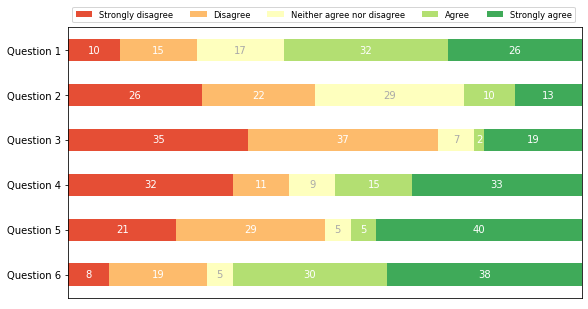

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()



In [6]:
import pandas as pd

In [15]:
df = pd.read_csv('cooccurrence_df.csv')

city_df = pd.read_csv('city_variations.csv')
cities = list(city_df['col'][city_df['pop']>1000])

C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\464192609.py:1: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cooccurrence_df.csv')


In [21]:
other = ['doc', 'line','created_utc', ' score', ' subreddit', ' link_id', ' subreddit_id']
df = df[other + cities]

In [34]:
subs = df[' subreddit'].value_counts()[:10].keys()
top10subs = 

In [62]:
askeurope_df = df[df[' subreddit']==subs[9]]
askeurope_df

doc    line  created_utc  score   subreddit     link_id  \
93202    2013-12   64391   1388276530      6   AskEurope   t3_1ttjyc   
93528    2013-12   56041   1387912326      1   AskEurope   t3_1tiw38   
93750    2013-12   54514   1387838091      1   AskEurope   t3_1tiw38   
94319    2013-12   17362   1386480585      1   AskEurope   t3_1s62vw   
95545    2013-12   32087   1387022728      1   AskEurope   t3_1suo3j   
...          ...     ...          ...    ...         ...         ...   
1120932  2021-01   96881   1610371773      5   AskEurope   t3_kv135m   
1121067  2021-01   94923   1610352497      6   AskEurope   t3_kubuaw   
1121297  2021-01  102053   1610410412      1   AskEurope   t3_kv3w6h   
1121332  2021-01   99100   1610388191      1   AskEurope   t3_ku9an1   
1121351  2021-01   98189   1610381844      3   AskEurope   t3_kuthsu   

         subreddit_id  Paris  London  Madrid  ...  Prague_merged  Sofia  \
93202        t5_2uayg      0       0       0  ...              0      0   
93528        t5_2uayg      0       0       0  ...              0      0   
93750        t5_2uayg      0       0       0  ...              0      0   
94319        t5_2uayg      1       0       0  ...              0      0   
95545        t5_2uayg      1       0       0  ...              0      0   
...               ...    ...     ...     ...  ...            ...    ...   
1120932      t5_2uayg      0       0       1  ...              0      0   
1121067      t5_2uayg      0       0       0  ...              0      0   
1121297      t5_2uayg      0       0       0  ...              0      0   
1121332      t5_2uayg      1       0       0  ...              0      0   
1121351      t5_2uayg      0       0       0  ...              0      0   

         Liverpool  Porto  Sevilla_merged  Dublin  Helsinki  Amsterdam  \
93202            0      0               0       0         0          1   
93528            0      0               0       0         0          0   
93750            0      0               0       0         0          0   
94319            0      0               0       0         0          0   
95545            0      0               0       0         0          1   
...            ...    ...             ...     ...       ...        ...   
1120932          0      0               0       0         0          0   
1121067          0      0               0       0         0          0   
1121297          0      0               0       0         0          0   
1121332          0      0               0       0         0          0   
1121351          0      0               0       0         0          1   

         Rotterdam  Düsseldorf  
93202            0           0  
93528            0           0  
93750            0           0  
94319            0           0  
95545            0           0  
...            ...         ...  
1120932          0           0  
1121067          0           0  
1121297          0           0  
1121332          0           0  
1121351          0           0  

[14929 rows x 46 columns]

In [63]:
def pair_to_string(pair):
    
    pair.sort()
    #turn a city-pair list into a string 
    text = str(pair).replace('[','').replace(']','').replace('\'','').replace(',','-').replace(' ','')
    return text

def create_counts_df(toponyms, df):
    
    #input toponym co-occurrence matrix, output into a sorted list of city-pair counts
    #used to determine highlight pairs for graph
    
    combinations = list(itertools.combinations(toponyms, 2))
    cols = ['pair', 'count', 'indices']
    data = []
    for i in combinations:
        i = list(i)
        c1 = i[0]
        c2 = i[1]
        i = pair_to_string(i).replace('_merged', '')
        row = []
        row.append(i)
        city_df = df[df[c1]==1][df[c2]==1]
        count = len(city_df)
        row.append(count)
        occurrances = list(city_df.index)
        row.append(occurrances)
        data.append(row)

    df2 = pd.DataFrame(data, columns=cols).sort_values(by = 'count', ascending=False)
    
    return df2

counts_df = create_counts_df(cities, askeurope_df)

C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


In [70]:
sub_count_dfs = {}
for i in subs:
    sub_df = df[df[' subreddit']==i]
    counts_df = create_counts_df(cities, sub_df)
    sub_count_dfs[i] = counts_df
    print(i+' done')

C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 soccer done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 AskReddit done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 travel done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 europe done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 reddevils done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 LiverpoolFC done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 solotravel done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 worldnews done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 ukpolitics done


C:\Users\kodri\AppData\Local\Temp\ipykernel_6584\111982926.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_df = df[df[c1]==1][df[c2]==1]


 AskEurope done


In [122]:
len(category_names)

16

In [130]:
# Make a list of top 10 for each sub. Combine lists into a set.
pairs = set()
for i in sub_count_dfs.keys():
    top10 = set(sub_count_dfs[i].iloc[:1]['pair'])
    pairs = pairs.union(top10)
category_names = list(pairs)

In [131]:
results = {}
for sub in subs:
    counts = []
    for pair in category_names:
        temp_df = sub_count_dfs[sub].set_index('pair')
        counts.append(temp_df.loc[pair]['count'])
    total = sum(counts)
    counts = counts/total
    results[sub] = counts

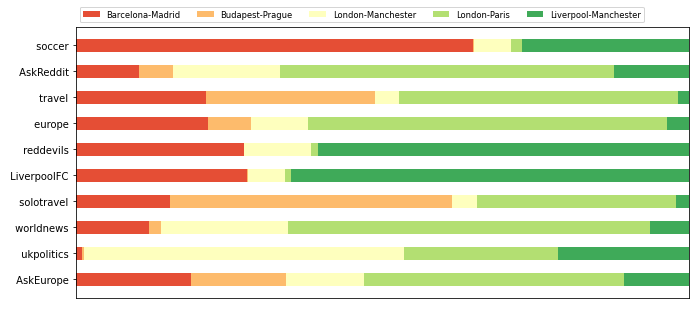

In [143]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
       
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()